In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# Initial data preprocessing

In [92]:
df_initial = pd.read_csv('11.csv')

In [93]:
#let's obtain some info about dataset
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DOI                     5000 non-null   object 
 1   Date                    4573 non-null   object 
 2   Journal                 4573 non-null   object 
 3   Title                   4573 non-null   object 
 4   Name                    4996 non-null   object 
 5   measurement_error       5000 non-null   float64
 6   measurement_wavelength  565 non-null    object 
 7   measurement_method      5000 non-null   object 
 8   normalised_name         2941 non-null   object 
 9   raw_value               5000 non-null   object 
 10  specifier               5000 non-null   object 
dtypes: float64(1), object(10)
memory usage: 429.8+ KB


In [94]:
df_initial.measurement_error.unique()

array([0.000000e+00, 5.750000e-02, 2.000000e-01, 2.000000e-02,
       1.650000e-01, 5.000000e-03, 1.650000e+00, 1.000000e+00,
       1.000000e-02, 1.500000e-03, 1.900000e+00, 2.000000e-03,
       3.000000e-02, 1.750000e-03, 5.000000e-02, 6.000000e-04,
       1.000000e-01, 4.000000e-01, 2.000000e+00, 3.500000e-02,
       8.000000e-02, 1.500000e-02, 1.000000e-04, 8.000000e-05,
       3.000000e-03, 1.150000e-01, 4.400000e-01, 1.200000e-01,
       6.500000e-02, 1.105000e+00, 4.500000e+00, 6.000000e-02,
       8.900000e-02, 4.000000e-03, 1.815000e-03, 4.000000e-02,
       1.600000e-02, 3.000000e-01, 2.980000e-02, 2.690000e+00,
       9.000000e-02, 5.000000e-04, 2.250000e+00, 7.270000e-04,
       1.850000e+00, 1.500000e-01, 5.000000e-01, 6.400000e-01,
       8.500000e-01, 1.150000e+00, 4.950000e+00, 7.700000e-01,
       9.100000e-01, 2.820000e+00, 3.100000e-01, 2.700000e-01,
       1.750000e+00, 3.300000e-01, 1.000000e-03, 7.500000e-02,
       2.500000e-01, 6.300000e-03, 6.000000e-03, 1.6000

In [95]:
df_initial.measurement_wavelength.unique()

array([nan, '9600 nm', '10 μm', '0.3 nm', '632.8 nm', '0.38 μm', '357 nm',
       '543 nm', '9180 nm', '700 nm', '673 nm', '1.238 μm', '670 nm',
       '43.0 μm', '550 nm', '585 nm', '400 nm', '633 nm', '549 nm',
       '4.00 μm', '1.22 μm', '1.54 μm', '420 nm', '514.5 nm', '2120 nm',
       '1064 nm', '0.2190 μm', '0.5080 μm', '574.15 nm', '288.5 nm',
       '1550 nm', '850 nm', '0.4410 μm', '0.47 μm', '990 nm', '679 nm',
       '500 nm', '1498.5 nm', '589 nm', '315.8 nm', '2 nm', '589.3 nm',
       '386 nm', '0.8010 μm', '641 nm', '480 nm', '568.7 nm', '362.0 nm',
       '0.34 μm', '445 nm', '31 nm', '701 nm', '284.5 nm', '2.2093 μm',
       '278 nm', '413.3 nm', '713 nm', '0 nm', '467 nm', '1.446 nm',
       '1200 nm', '546.07 nm', '175 nm', '598 nm', '4.17 μm', '535 nm',
       '1.06 μm', '600 nm', '330 nm', '543.5 nm', '398.95 nm', '546.1 nm',
       '532 nm', '305 nm', '565 nm', '517 nm', '2960 nm', '800 nm',
       '3850 nm', '830 nm', '498.5 nm', '0.3400 μm', '0.89 μm',
       

In [96]:
df_initial.measurement_method.unique()

array(['el_cde_tables', 'el_mylogic', 'rsc_cde_tables', 'el_cde_text',
       'rsc_cde_text', 'rsc_mylogic', 'snowball', 'springer_cde_text',
       'springer_cde_table'], dtype=object)

In [97]:
df_initial.normalised_name.unique()

array([nan, "[['B', 1.0], ['Na', 1.0], ['Ph', 4.0]]",
       'Oc1ccc2c(Oc3cc(O)ccc3C24OC(=O)c5cc(ccc45)N=C=S)c1', ...,
       "[['Br', 8.0], ['Cs', 2.0], ['Hg', 3.0]]",
       "[['P', 16.0], ['V', 1.0]]", 'N#[Ta]'], dtype=object)

In [98]:
df_initial.raw_value.unique()

array(['1.3373', '1.5056', '1.62', ..., '1.45931', '1.59 2.10 2.07 2.25',
       '1.3959'], dtype=object)

In [99]:
df_initial.specifier.unique()

array(['Refractive index', 'nD', 'n', 'Refractive index, n',
       'Range of RI', 'refractive index', 'RI',
       'Refractive index @ 587.3\u202fnm', 'refractive indices', 'ri',
       'refractive index n', 'Refractive index at 1.5 μm ± 0.005', ' n ',
       'Refractive index at 632.8\u2009nm', 'Refractive index n Refs.',
       'Index of refraction', 'R.I', 'Linear refractive index',
       'refractive indices n', 'Refractive index (η)',
       'Refractive index range',
       'Refractive index by TAPPI-ASTM equation', 'Refractive Index',
       'Refractive index of various solution',
       'Refractive index (n at 700 nm)', 'Refractive index (nD)',
       'RI (max)', 'RI @ 633\u2009nm', 'index of refraction',
       'Refractive index (n) at 550 nm', 'Refractive index (n)',
       'Refractive index (20 °C)', 'Refractive index, [n]D',
       'Refractive index (n) @ 400\u202fnm', 'refraction index',
       'Refractive index n', 'Refractive index of ZnS', 'Lit. R.I.',
       'Refractiv

As we can see, we have a lot of nan values in the measurement_wavelength column that we can fill using information from the specifier column

In [100]:
import re
for i,_ in df_initial.iterrows():
    if df_initial.measurement_wavelength[i] is np.nan:
        wavelength = re.findall('[0-9][0-9]*[.]?[0-9]*[\s][n-μ][m]', df_initial.specifier[i]) #find values of the wavelenghts in the specifier values
        if len(wavelength) != 0:
            df_initial.measurement_wavelength[i] = wavelength[0]

/tmp/ipykernel_2377/910434856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_initial.measurement_wavelength[i] = wavelength[0]


In [101]:
df_initial = df_initial.drop(columns='specifier')

In [102]:
df_initial.measurement_wavelength.unique()

array([nan, '9600 nm', '10 μm', '0.3 nm', '632.8 nm', '0.38 μm', '357 nm',
       '543 nm', '9180 nm', '700 nm', '673 nm', '1.238 μm', '670 nm',
       '43.0 μm', '550 nm', '585 nm', '400 nm', '633 nm', '549 nm',
       '4.00 μm', '1.22 μm', '1.54 μm', '420 nm', '514.5 nm', '2120 nm',
       '1064 nm', '0.2190 μm', '0.5080 μm', '574.15 nm', '288.5 nm',
       '1550 nm', '850 nm', '0.4410 μm', '0.47 μm', '990 nm', '679 nm',
       '500 nm', '1498.5 nm', '589 nm', '315.8 nm', '2 nm', '589.3 nm',
       '386 nm', '0.8010 μm', '641 nm', '480 nm', '568.7 nm', '362.0 nm',
       '0.34 μm', '445 nm', '31 nm', '701 nm', '284.5 nm', '2.2093 μm',
       '278 nm', '413.3 nm', '713 nm', '0 nm', '467 nm', '1.446 nm',
       '1200 nm', '546.07 nm', '175 nm', '598 nm', '4.17 μm', '535 nm',
       '1.06 μm', '600 nm', '330 nm', '543.5 nm', '398.95 nm', '546.1 nm',
       '532 nm', '305 nm', '565 nm', '517 nm', '2960 nm', '800 nm',
       '3850 nm', '8 μm', '830 nm', '498.5 nm', '0.3400 μm', '0.89 μm',

In [103]:
#converting these values into the float format
for i,_ in df_initial.iterrows():
    try:
        if str(df_initial.measurement_wavelength[i]) == 'nan':
            continue
        elif df_initial.measurement_wavelength[i][-2:] == 'nm':
            df_initial.measurement_wavelength[i] = float(df_initial.measurement_wavelength[i].split(' ')[0])
        elif df_initial.measurement_wavelength[i] == '12\u2009μm':
            df_initial.measurement_wavelength[i] = 12
        elif df_initial.measurement_wavelength[i][-2:] == 'μm':
            df_initial.measurement_wavelength[i] = float(df_initial.measurement_wavelength[i].split(' ')[0])*1000
    except:
        print(df_initial.measurement_wavelength[i])

/tmp/ipykernel_2377/2547463161.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_initial.measurement_wavelength[i] = float(df_initial.measurement_wavelength[i].split(' ')[0])
/tmp/ipykernel_2377/2547463161.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_initial.measurement_wavelength[i] = float(df_initial.measurement_wavelength[i].split(' ')[0])*1000
/tmp/ipykernel_2377/2547463161.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [104]:
df_initial.info() #we have found only 16 values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DOI                     5000 non-null   object 
 1   Date                    4573 non-null   object 
 2   Journal                 4573 non-null   object 
 3   Title                   4573 non-null   object 
 4   Name                    4996 non-null   object 
 5   measurement_error       5000 non-null   float64
 6   measurement_wavelength  581 non-null    object 
 7   measurement_method      5000 non-null   object 
 8   normalised_name         2941 non-null   object 
 9   raw_value               5000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 390.8+ KB


It is logically assume that measurement_wavelength should be connected with the measurement_method or measurement_error. Let's check this assumption

In [105]:
#let's convert measurement_method into the categorical numbers according to the index in the df.measurement_method.unique().tolist() list
measurement_method = df_initial.measurement_method.unique().tolist()
for i,_ in df_initial.iterrows():
    df_initial.measurement_method[i] = measurement_method.index(df_initial.measurement_method[i])
print(df_initial.measurement_method)

/tmp/ipykernel_2377/235432488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_initial.measurement_method[i] = measurement_method.index(df_initial.measurement_method[i])


0       0
1       1
2       0
3       0
4       0
       ..
4995    1
4996    3
4997    2
4998    2
4999    1
Name: measurement_method, Length: 5000, dtype: object


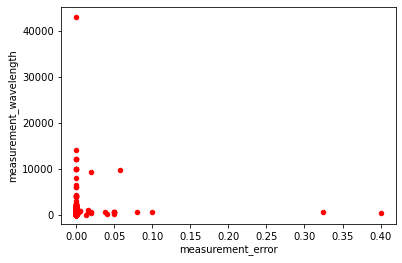

In [106]:
df_initial.plot(x='measurement_error', y='measurement_wavelength', kind = 'scatter', color= 'red')
plt.show()

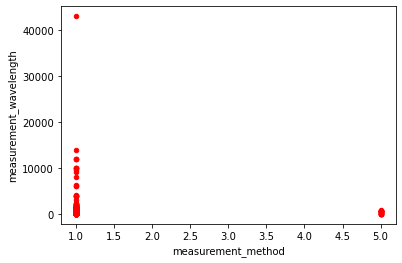

In [107]:
df_initial.plot(x='measurement_method', y='measurement_wavelength', kind = 'scatter', color= 'red')
plt.show()

In [108]:
df_initial.measurement_wavelength.isna().sum()/len(df_initial)

0.8838

Unfortunatelly, we cannot handle 'nan' values in the measurement_wavelength column using connections with other parameters. Given that we have 88% 'nan' values, we have to delete this column

In [109]:
df_initial = df_initial.drop(columns='measurement_wavelength')

Convert raw_value into numerical values

In [110]:
import re
for i,_ in df_initial.iterrows():
    values = list(map(float, re.findall('[0-9]+[\.]?[0-9]*', str(df_initial.raw_value[i]).split('±')[0])))
    df_initial.raw_value[i] = sum(values)/len(values)

/tmp/ipykernel_2377/1535553680.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_initial.raw_value[i] = sum(values)/len(values)


Also, let's delete outliers in the raw_value column:

In [112]:
Q1 =  df_initial['raw_value'].quantile(0.25)
Q3 = df_initial['raw_value'].quantile(0.75)
IQR = Q3 - Q1
for i,_ in df_initial.iterrows():
    if df_initial['raw_value'][i] < Q1-1.5*IQR or df_initial['raw_value'][i] > Q3+1.5*IQR:
        df_initial = df_initial.drop(i)

In [113]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4471 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DOI                 4471 non-null   object 
 1   Date                4074 non-null   object 
 2   Journal             4074 non-null   object 
 3   Title               4074 non-null   object 
 4   Name                4468 non-null   object 
 5   measurement_error   4471 non-null   float64
 6   measurement_method  4471 non-null   object 
 7   normalised_name     2634 non-null   object 
 8   raw_value           4471 non-null   object 
dtypes: float64(1), object(8)
memory usage: 478.3+ KB


In [114]:
df_initial.measurement_error.value_counts()

0.0000    4225
0.0500      18
0.0100      17
0.1000      15
0.0050      12
          ... 
0.0575       1
0.0060       1
0.0063       1
0.2500       1
0.6800       1
Name: measurement_error, Length: 105, dtype: int64

In [115]:
df_initial.measurement_error.value_counts()[0]/len(df_initial)

0.9449787519570566

There is high bias to the 0 values (93% values). So, we can delete this column

In [116]:
df_initial = df_initial.drop(columns='measurement_error')

In [117]:
df_initial.measurement_method.value_counts()

1    2011
0    1272
3     327
6     302
2     198
4     197
5      95
7      50
8      19
Name: measurement_method, dtype: int64

In [118]:
df_initial.normalised_name.unique()

array([nan, "[['B', 1.0], ['Na', 1.0], ['Ph', 4.0]]",
       'Oc1ccc2c(Oc3cc(O)ccc3C24OC(=O)c5cc(ccc45)N=C=S)c1', ...,
       'C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@]34C)[C@@H]1CC[C@@H]2C(=O)CO',
       "[['Br', 8.0], ['Cs', 2.0], ['Hg', 3.0]]", 'OC(=O)Cc1ccccc1'],
      dtype=object)

In [119]:
df_initial.normalised_name.isna().sum()/len(df_initial)

0.4108700514426303

A lot of nan values and there are no rule for implementation of these values. So, delete them

In [120]:
df_initial = df_initial.drop(columns='normalised_name')

In [121]:
df_initial.Name.isna().sum()

3

Drop nan values in the Name column

In [122]:
for i,_ in df_initial.iterrows():
    if str(df_initial.Name[i]) == 'nan':
        df_initial = df_initial.drop(i)

In [123]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4468 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DOI                 4468 non-null   object
 1   Date                4071 non-null   object
 2   Journal             4071 non-null   object
 3   Title               4071 non-null   object
 4   Name                4468 non-null   object
 5   measurement_method  4468 non-null   object
 6   raw_value           4468 non-null   object
dtypes: object(7)
memory usage: 408.3+ KB


In [124]:
df_initial.to_csv('df_init_prepros.csv', index=False)

In [ ]:
#we will use names of substances from this column for parsing descriptors
df_initial.Name

However, it was shown that some names in the column give us different SMILES representations that will affect on our descriptors (because we will take descriptors for substances using SMILES). So, we proposed using three different name to SMILES convert methods (cirpy package, pubchem and cactus URLs). Final SMILES will be obtained if two of three converters show similar SMILES (or random SMILES if all three values are different)

In [ ]:
import cirpy
import requests
import json
from urllib.request import urlopen
from urllib.parse import quote
import pandas as pd


smiles_cirpy = []
for i,_ in df_initial.iterrows():
    try:
        smiles = cirpy.resolve(df_initial['Name'][i], 'smiles')
        smiles_cirpy.append(smiles)
    except:
        smiles_cirpy.append('None')

        
smiles_pubchem = []
for i,_ in df_initial.iterrows():
    try:
        name = df_initial['Name'][i]
        url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{name}/property/CanonicalSMILES/json"
        response = requests.get(url)
        data = json.loads(response.text)
        smiles = data['PropertyTable']['Properties'][0]['CanonicalSMILES']
        smiles_pubchem.append(smiles)
    except:
        smiles_pubchem.append('None')

        
smiles_cactus = []
for i,_ in df_initial.iterrows():
    try:
        name = df_initial['Name'][i]
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(name) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        smiles_cactus.append(ans)
    except:
        smiles_cactus.append('None')

df_initial['smiles_cirpy'] = smiles_cirpy
df_initial['smiles_pubchem'] = smiles_pubchem
df_initial['smiles_cactus'] = smiles_cactus

In [130]:
df_initial.to_csv('df_smiles.csv', index=False)

In [133]:
df_smiles = pd.read_csv('df_smiles.csv')

In [134]:
df_smiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4468 entries, 0 to 4467
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4468 non-null   int64  
 1   DOI                 4468 non-null   object 
 2   Date                4071 non-null   object 
 3   Journal             4071 non-null   object 
 4   Title               4071 non-null   object 
 5   Name                4468 non-null   object 
 6   measurement_method  4468 non-null   int64  
 7   raw_value           4468 non-null   float64
 8   smiles_cirpy        3230 non-null   object 
 9   smiles_pubchem      4468 non-null   object 
 10  smiles_cactus       4468 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 384.1+ KB


In [136]:
import collections
import random

final_smiles = []
for i, _ in df_smiles.iterrows():
    smiles = [df_smiles.smiles_cirpy[i], df_smiles.smiles_pubchem[i], df_smiles.smiles_cactus[i]]
    count_smiles = collections.Counter(smiles)
    j = count_smiles.most_common(1)[0][0]
    if str(j) == 'nan' and count_smiles[j] == 3: #all three nan
        final_smiles.append(np.nan)
    if str(j) != 'nan' and count_smiles[j] > 1: #two of three SMILES are similar and not nan
        final_smiles.append(j)
    else: #choosing a random value
        j = smiles[random.randint(0, 2)]
        while str(j) == 'nan':
            j = smiles[random.randint(0, 2)]
        final_smiles.append(j)
print(len(final_smiles))

4468


In [137]:
df_smiles['smiles'] = final_smiles

In [174]:
df_smiles = df_smiles.drop(columns=['smiles_cirpy', 'smiles_pubchem', 'smiles_cactus'])

In [175]:
df_smiles.to_csv('df_final_smiles.csv', index=False)

In [176]:
df_final_smiles = pd.read_csv('df_final_smiles.csv')

# Let's start our parsing with the PubChemPy API. Using it, we can collect 43 descriptors:

In [141]:
import pubchempy as pcp

In [7]:
df_final_smiles = pd.read_csv('df_final_smiles.csv')

In [8]:
#available descriptors
descriptors_pcp = pcp.get_compounds('NaCl', 'name', as_dataframe=True).columns.to_list()
for i in descriptors_pcp:
    print(i)

atom_stereo_count
atoms
bond_stereo_count
bonds
cactvs_fingerprint
canonical_smiles
charge
complexity
conformer_id_3d
conformer_rmsd_3d
coordinate_type
covalent_unit_count
defined_atom_stereo_count
defined_bond_stereo_count
effective_rotor_count_3d
elements
exact_mass
feature_selfoverlap_3d
fingerprint
h_bond_acceptor_count
h_bond_donor_count
heavy_atom_count
inchi
inchikey
isomeric_smiles
isotope_atom_count
iupac_name
mmff94_energy_3d
mmff94_partial_charges_3d
molecular_formula
molecular_weight
monoisotopic_mass
multipoles_3d
pharmacophore_features_3d
record
rotatable_bond_count
shape_fingerprint_3d
shape_selfoverlap_3d
tpsa
undefined_atom_stereo_count
undefined_bond_stereo_count
volume_3d
xlogp


In [9]:
# so, we create a DataFrame that will include all data about descriptors. Firstly, create the dataframe with requiring columns
df_pcp = pd.DataFrame(columns=descriptors_pcp)

In [10]:
# enumeration of all names in the initial DataFrame. Calculated for this name descriptors is inserting in the df_pcp Dataframe. 
#If this name cannot be used for calculating descriptors, nan row is incerting
df_nan = pd.DataFrame(columns=descriptors_pcp, index=[0])
for i,_ in df_final_smiles.iterrows():
    try:
        df_pcp = pd.concat([df_pcp, pcp.get_compounds(df_final_smiles.smiles[i], 'smiles', as_dataframe=True).iloc[:1]])
    except:
        df_pcp = pd.concat([df_pcp, df_nan])

In [11]:
#let's check everything is OK in the obtained database
df_pcp

,atom_stereo_count,atoms,bond_stereo_count,bonds,cactvs_fingerprint,canonical_smiles,charge,complexity,conformer_id_3d,conformer_rmsd_3d,...,pharmacophore_features_3d,record,rotatable_bond_count,shape_fingerprint_3d,shape_selfoverlap_3d,tpsa,undefined_atom_stereo_count,undefined_bond_stereo_count,volume_3d,xlogp
5234,0,"[{'aid': 1, 'number': 17, 'element': 'Cl', 'x'...",0,"[{'aid1': 1, 'aid2': 2, 'order': 7}]",0000000000000000000000000010000000000100000000...,[Na+].[Cl-],0,2,None,None,...,None,"{'id': {'id': {'cid': 5234}}, 'atoms': {'aid':...",0,None,None,0,0,0,None,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,NaN
18730,0,"[{'aid': 1, 'number': 16, 'element': 'S', 'x':...",0,"[{'aid1': 1, 'aid2': 28, 'order': 2}, {'aid1':...",1100000001111010001110000000000001000000000000...,C1=CC2=C(C=C1N=C=S)C(=O)OC23C4=C(C=C(C=C4)O)OC...,0,668,None,None,...,None,"{'id': {'id': {'cid': 18730}}, 'atoms': {'aid'...",1,None,None,120,0,0,None,4.8
4628300,0,"[{'aid': 1, 'number': 29, 'element': 'Cu', 'x'...",0,"[{'aid1': 1, 'aid2': 3, 'order': 6}, {'aid1': ...",0000000000000000001100000000000000000000000000...,[O-][O-].[Cu+2].[Cu+2],2,4,None,None,...,None,"{'id': {'id': {'cid': 4628300}}, 'atoms': {'ai...",0,None,None,46.1,0,0,None,None
1031,0,"[{'aid': 1, 'number': 8, 'element': 'O', 'x': ...",0,"[{'aid1': 1, 'aid2': 3, 'order': 1}, {'aid1': ...",1100000001000000001000000000000000000000000000...,CCCO,0,7.2,None,None,...,None,"{'id': {'id': {'cid': 1031}}, 'atoms': {'aid':...",1,None,None,20.2,0,0,None,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6365,0,"[{'aid': 1, 'number': 17, 'element': 'Cl', 'x'...",0,"[{'aid1': 1, 'aid2': 3, 'order': 1}, {'aid1': ...",1000000001000000000000000000000000000110000000...,CC(Cl)Cl,0,11.5,None,None,...,None,"{'id': {'id': {'cid': 6365}}, 'atoms': {'aid':...",0,None,None,0,0,0,None,1.9
8301,0,"[{'aid': 1, 'number': 9, 'element': 'F', 'x': ...",0,"[{'aid1': 1, 'aid2': 5, 'order': 1}, {'aid1': ...",0000000001000000000000011100000000000000000000...,C(=C(F)F)(F)F,0,55.6,None,None,...,None,"{'id': {'id': {'cid': 8301}}, 'atoms': {'aid':...",0,None,None,0,0,0,None,1.3
54104351,0,"[{'aid': 1, 'number': 15, 'element': 'P', 'x':...",0,"[{'aid1': 1, 'aid2': 2, 'order': 1}, {'aid1': ...",1000000001100000001110000000001000000000000000...,C(CC(=O)OP(=O)(O)O)C(=O)O,0,228,None,None,...,None,"{'id': {'id': {'cid': 54104351}}, 'atoms': {'a...",5,None,None,121,0,0,None,-2.1
6560,0,"[{'aid': 1, 'number': 8, 'element': 'O', 'x': ...",0,"[{'aid1': 1, 'aid2': 3, 'order': 1}, {'aid1': ...",1100000001100000001000000000000000000000000000...,CC(C)CO,0,17.6,None,None,...,None,"{'id': {'id': {'cid': 6560}}, 'atoms': {'aid':...",1,None,None,20.2,0,0,None,0.8


In [12]:
df_pcp.to_csv('df_pcp.csv', index=False)

# Next, we can use rdkit software to collect 43 new descriptors:

In [14]:
!pip install rdkit

Defaulting to user installation because normal site-packages is not writeable


In [15]:
!pip install pubchempy

Defaulting to user installation because normal site-packages is not writeable


In [145]:
import rdkit
from rdkit.Chem import rdMolDescriptors
import pubchempy as pcp

In [146]:
#available descriptors
descriptors_rdkit = rdMolDescriptors.Properties.GetAvailableProperties()
for i in descriptors_rdkit:
    print(i)

exactmw
amw
lipinskiHBA
lipinskiHBD
NumRotatableBonds
NumHBD
NumHBA
NumHeavyAtoms
NumAtoms
NumHeteroatoms
NumAmideBonds
FractionCSP3
NumRings
NumAromaticRings
NumAliphaticRings
NumSaturatedRings
NumHeterocycles
NumAromaticHeterocycles
NumSaturatedHeterocycles
NumAliphaticHeterocycles
NumSpiroAtoms
NumBridgeheadAtoms
NumAtomStereoCenters
NumUnspecifiedAtomStereoCenters
labuteASA
tpsa
CrippenClogP
CrippenMR
chi0v
chi1v
chi2v
chi3v
chi4v
chi0n
chi1n
chi2n
chi3n
chi4n
hallKierAlpha
kappa1
kappa2
kappa3
Phi


In [147]:
#create a DataFrame that will include all data about descriptors
df_rdkit = pd.DataFrame(columns=descriptors_rdkit)

In [ ]:
df_nan = pd.DataFrame(columns=descriptors_rdkit, index=[0])
get_descriptors = rdMolDescriptors.Properties(descriptors_rdkit)
for i,_ in df_final_smiles.iterrows():
    try:
        mol = rdkit.Chem.MolFromSmiles(df_final_smiles.smiles[i])
        df_rdkit = pd.concat([df_rdkit, pd.DataFrame(np.array(get_descriptors.ComputeProperties(mol)).reshape(1,-1), columns=descriptors_rdkit)])
    except:
        df_rdkit = pd.concat([df_rdkit, df_nan])

In [149]:
#let's check everything is OK in the obtained database
df_rdkit

,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,...,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
0,57.958622,58.443,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,...,1.377964,0.000000,0.000000,0.000000,0.000000,1.29,10.367820,2.290000,0.065194,11.871154
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,389.035793,389.388,6.0,2.0,1.0,2.0,7.0,28.0,39.0,7.0,...,14.170786,8.333274,4.931788,4.931788,3.815680,-3.67,16.499791,5.661360,2.113625,3.336116
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,60.057515,60.096,1.0,1.0,1.0,1.0,1.0,4.0,12.0,1.0,...,2.861427,1.523335,0.223607,0.223607,0.000000,-0.04,3.960000,2.960000,1.960000,2.930400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,97.969005,98.960,0.0,0.0,0.0,0.0,0.0,4.0,8.0,2.0,...,2.333279,1.013786,0.000000,0.000000,0.000000,0.58,4.580000,1.859330,19.145993,2.128932
0,99.993613,100.014,0.0,0.0,0.0,0.0,0.0,6.0,6.0,4.0,...,2.511858,1.005929,0.142857,0.142857,0.000000,-0.54,5.460000,1.791026,1.749017,1.629833
0,197.992939,198.067,7.0,3.0,4.0,3.0,4.0,12.0,19.0,8.0,...,5.836061,2.808234,0.763725,0.763725,0.387274,-0.91,11.090000,4.199494,7.200011,3.881032
0,74.073165,74.123,1.0,1.0,1.0,1.0,1.0,5.0,15.0,1.0,...,3.731671,1.879177,0.365148,0.365148,0.000000,-0.04,4.960000,2.212525,3.960000,2.194825


In [150]:
df_rdkit.to_csv('df_rdkit.csv', index=False)

# Next, we can use pymatgen software (MaterialsProject API) to collect 74 new descriptors:

In [5]:
import pymatgen
from pymatgen.ext.matproj import MPRester

In [1]:
#we will always take the first record of the substance
from pymatgen.ext.matproj import MPRester
with MPRester(api_key='px27m7fBcI17PKBcjzdb6AtN8j7v9SQH') as m:
     results = m.summary.search(formula="NaCl")

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/pk/.local/lib/python3.10/site-packages/mp_api/client/mprester.py:146: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(


Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
#let's get the list of available descriptors
descriptors_pymatgen = []
for i in range(len(list(results[0]))):
    descriptors_pymatgen.append(list(results[0])[i][0])
    print(list(results[0])[i][0])

builder_meta
nsites
elements
nelements
composition
composition_reduced
formula_pretty
formula_anonymous
chemsys
volume
density
density_atomic
symmetry
property_name
material_id
deprecated
deprecation_reasons
last_updated
origins
warnings
structure
task_ids
uncorrected_energy_per_atom
energy_per_atom
formation_energy_per_atom
energy_above_hull
is_stable
equilibrium_reaction_energy_per_atom
decomposes_to
xas
grain_boundaries
band_gap
cbm
vbm
efermi
is_gap_direct
is_metal
es_source_calc_id
bandstructure
dos
dos_energy_up
dos_energy_down
is_magnetic
ordering
total_magnetization
total_magnetization_normalized_vol
total_magnetization_normalized_formula_units
num_magnetic_sites
num_unique_magnetic_sites
types_of_magnetic_species
k_voigt
k_reuss
k_vrh
g_voigt
g_reuss
g_vrh
universal_anisotropy
homogeneous_poisson
e_total
e_ionic
e_electronic
n
e_ij_max
weighted_surface_energy_EV_PER_ANG2
weighted_surface_energy
weighted_work_function
surface_anisotropy
shape_factor
has_reconstructed
possible_s

In [4]:
import pandas as pd

In [5]:
#create a DataFrame that will include all data about descriptors
df_pymatgen = pd.DataFrame(columns=descriptors_pymatgen)

In [ ]:
# enumeration of all names in the DataFrame. Calculated for this name descriptors is inserting in the df_pymatgen Dataframe. 
#If this name cannot be used for calculating descriptors, nan row is incerting
df_nan = pd.DataFrame(columns=descriptors_pymatgen, index=[0])
for i,_ in df_final_smiles.iterrows():
    try:
        df_new_row = pd.DataFrame(columns=descriptors_pymatgen, index=[0])
        with MPRester(api_key='px27m7fBcI17PKBcjzdb6AtN8j7v9SQH') as m:
            results = m.summary.search(formula=df_final_smiles.Name[i]) 
        for i in range(len(list(results[0]))):
            df_new_row.at[0, list(results[0])[i][0]] = list(results[0])[i][1]
        df_pymatgen = pd.concat([df_pymatgen, df_new_row])
    except:
        df_pymatgen = pd.concat([df_pymatgen, df_nan])

In [11]:
#let's check everything is OK in the obtained database
df_pymatgen

,builder_meta,nsites,elements,nelements,composition,composition_reduced,formula_pretty,formula_anonymous,chemsys,volume,...,weighted_surface_energy,weighted_work_function,surface_anisotropy,shape_factor,has_reconstructed,possible_species,has_props,theoretical,database_IDs,fields_not_requested
0,emmet_version='0.38.6' pymatgen_version='2022....,12,"[Cl, Na]",2,"(Na, Cl)","(Na, Cl)",NaCl,AB,Cl-Na,284.082319,...,None,None,None,None,None,"[Na+, Cl-]","[HasProps.oxi_states, HasProps.thermo, HasProp...",True,{},[]
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,emmet_version='0.38.6' pymatgen_version='2022....,16,"[F, H, Mg, O]",4,"(Mg, H, O, F)","(Mg, H, O, F)",MgHOF,ABCD,F-H-Mg-O,151.014639,...,None,None,None,None,None,"[F-, Mg2+, H+, O2-]","[HasProps.oxi_states, HasProps.materials, HasP...",False,{icsd: ['icsd-186501']},[]
0,emmet_version='0.38.6' pymatgen_version='2022....,4,"[Cu, O]",2,"(Cu, O)","(Cu, O)",CuO,AB,Cu-O,44.21362,...,None,None,None,None,None,"[O2-, Cu2+]","[HasProps.thermo, HasProps.materials, HasProps...",True,{},[]
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,emmet_version='0.38.6' pymatgen_version='2022....,16,"[F, H, Mg, O]",4,"(Mg, H, O, F)","(Mg, H, O, F)",MgHOF,ABCD,F-H-Mg-O,151.014639,...,None,None,None,None,None,"[F-, Mg2+, H+, O2-]","[HasProps.oxi_states, HasProps.materials, HasP...",False,{icsd: ['icsd-186501']},[]
0,emmet_version='0.38.6' pymatgen_version='2022....,100,"[S, Zn]",2,"(Zn, S)","(Zn, S)",ZnS,AB,S-Zn,2478.010635,...,None,None,None,None,None,"[S2-, Zn2+]","[HasProps.electronic_structure, HasProps.therm...",True,{},[]
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_pymatgen.to_csv('df_pymatgen.csv', index=False)

# Finally, we will use PaDelPy to collect 1875 descriptors

In [1]:
!pip install padelpy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from padelpy import from_smiles

In [3]:
# calculate molecular descriptors (propane was used just as an example)
descriptors_PaDELPy = list(from_smiles('CCC'))
descriptors_values = list(from_smiles('CCC').values())

In [4]:
#let's get the list of all available descriptors
list(descriptors_PaDELPy)

['nAcid',
 'ALogP',
 'ALogp2',
 'AMR',
 'apol',
 'naAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nH',
 'nB',
 'nC',
 'nN',
 'nO',
 'nS',
 'nP',
 'nF',
 'nCl',
 'nBr',
 'nI',
 'nX',
 'ATS0m',
 'ATS1m',
 'ATS2m',
 'ATS3m',
 'ATS4m',
 'ATS5m',
 'ATS6m',
 'ATS7m',
 'ATS8m',
 'ATS0v',
 'ATS1v',
 'ATS2v',
 'ATS3v',
 'ATS4v',
 'ATS5v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0e',
 'ATS1e',
 'ATS2e',
 'ATS3e',
 'ATS4e',
 'ATS5e',
 'ATS6e',
 'ATS7e',
 'ATS8e',
 'ATS0p',
 'ATS1p',
 'ATS2p',
 'ATS3p',
 'ATS4p',
 'ATS5p',
 'ATS6p',
 'ATS7p',
 'ATS8p',
 'ATS0i',
 'ATS1i',
 'ATS2i',
 'ATS3i',
 'ATS4i',
 'ATS5i',
 'ATS6i',
 'ATS7i',
 'ATS8i',
 'ATS0s',
 'ATS1s',
 'ATS2s',
 'ATS3s',
 'ATS4s',
 'ATS5s',
 'ATS6s',
 'ATS7s',
 'ATS8s',
 'AATS0m',
 'AATS1m',
 'AATS2m',
 'AATS3m',
 'AATS4m',
 'AATS5m',
 'AATS6m',
 'AATS7m',
 'AATS8m',
 'AATS0v',
 'AATS1v',
 'AATS2v',
 'AATS3v',
 'AATS4v',
 'AATS5v',
 'AATS6v',
 'AATS7v',
 'AATS8v',
 'AATS0e',
 'AATS1e',
 'AATS2e',
 'AATS3e',
 'AATS4e',
 'AATS5e',
 'AATS6e

In [ ]:
#create a DataFrame that will include all data about descriptors
df_PaDELPy = pd.DataFrame(columns=descriptors_PaDELPy)

In [ ]:
# enumeration of all names in the DataFrame. Calculated for this name descriptors is inserting in the df_PaDELPy Dataframe. 
#If this name cannot be used for calculating descriptors, nan row is incerting
df_nan = pd.DataFrame(columns=descriptors_PaDELPy, index=[0])
for i,_ in df_initial.iterrows():
    try:
        df_new_row = pd.DataFrame(columns=descriptors_PaDELPy, index=[0])
        df_PaDELPy = pd.concat([df_PaDELPy, pd.DataFrame([from_smiles(df_final_smiles.smiles[i])])])
    except:
        df_PaDELPy = pd.concat([df_PaDELPy, df_nan])

In [171]:
#let's check everything is OK in the obtained database
df_PaDELPy

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.0,NaN,NaN,NaN,25.780000,0.0,0.0,2.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,-1.1864,1.407545,30.7754,52.304723,18.0,18.0,39.0,28.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0000,0.000000,0.0000,13.804000,0.0,0.0,4.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,-0.6854,0.469773,16.0871,11.416344,0.0,0.0,12.0,4.0,8.0,...,0.655206,0.220086,0.595615,0.529887,0.456928,3.178534,2.559691,6.315715,0.482809,1.582430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4463,0.0,1.5407,2.373756,20.6602,10.547172,0.0,0.0,8.0,4.0,4.0,...,0.492724,0.312080,0.846405,0.413025,0.476614,2.469574,1.895894,4.817539,0.239086,1.736044
4464,0.0,1.2816,1.642499,12.4054,5.748000,0.0,0.0,6.0,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4465,3.0,-0.6898,0.475824,34.1231,20.951551,0.0,0.0,19.0,12.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4466,0.0,0.1242,0.015426,21.5446,14.509930,0.0,0.0,15.0,5.0,10.0,...,0.495053,0.362138,0.529740,0.452957,0.371929,3.592450,3.893548,8.673008,0.285786,1.354626


In [187]:
#concatenate all obtained dataframes to get the final one
df = pd.concat([df_final_smiles, df_pcp, df_rdkit, df_pymatgen, df_PaDELPy], axis=1)

In [188]:
#as we can see, our final database contains 2047 columns. So, we have 2039 columns of descriptors
df

,DOI,Date,Journal,Title,Name,measurement_method,raw_value,smiles,index,atom_stereo_count,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,10.1016/j.apradiso.2018.05.013,5/21/2018,Applied Radiation and Isotopes,EFFECTSSODIUMSALICYLATEDETERMINATIONLEAD210BIS...,NaCl,0,1.33730,[Na+].[Cl-],0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.1016/j.jct.2012.03.002,3/19/2012,The Journal of Chemical Thermodynamics,PHYSICOCHEMICALSTUDIESSODIUMTETRAPHENYLBORATET...,NaPh4B,1,1.50560,None,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.1016/j.jbiotec.2014.03.023,3/22/2014,Journal of Biotechnology,THERMODYNAMICINVESTIGATIONZ33ANTIBODYINTERACTI...,FITC,0,1.62000,Oc1ccc2c(Oc3cc(O)ccc3C24OC(=O)c5cc(ccc45)N=C=S)c1,2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.1016/j.solmat.2012.12.035,1/31/2013,Solar Energy Materials and Solar Cells,OPTICALREFLECTIONHETEROJUNCTIONINTERFACETHINFI...,CuO,0,2.58000,[Cu++]1[O-]2[Cu++][O-]12,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.1016/j.fluid.2008.10.013,12/5/2008,Fluid Phase Equilibria,ERRATUMVAPORLIQUIDEQUILIBRIUMDENSITIESINTERFAC...,Propan-1-ol,0,1.38333,CCCO,4,0.0,...,0.655206,0.220086,0.595615,0.529887,0.456928,3.178534,2.559691,6.315715,0.482809,1.582430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4463,10.1016/j.jmr.2011.06.010,6/20/2011,Journal of Magnetic Resonance,MODIFICATIONENCAPSULATIONPRESSUREREVERSEMICELL...,"1,1-Dichloroethane",0,1.41600,CC(Cl)Cl,4463,0.0,...,0.492724,0.312080,0.846405,0.413025,0.476614,2.469574,1.895894,4.817539,0.239086,1.736044
4464,10.1016/j.apsusc.2016.05.121,5/26/2016,Applied Surface Science,INVESTIGATIONOPTICALMICROSTRUCTURALPROPERTIESR...,PTFE,1,1.30000,FC(F)=C(F)F,4464,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4465,10.1016/j.spmi.2015.10.029,10/27/2015,Superlattices and Microstructures,OPTICALINVESTIGATIONSBLUESHIFTINZNSQUANTUMDOTS,ZnS,1,2.00250,C(CC(=O)OP(=O)(O)O)C(=O)O,4465,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4466,10.1039/C6AN00509H,6/20/2016,Analyst,A photochromic–acidochromic HCl fluorescent pr...,i-Butanol,2,1.39590,CC(C)CO,4466,0.0,...,0.495053,0.362138,0.529740,0.452957,0.371929,3.592450,3.893548,8.673008,0.285786,1.354626


In [189]:
df.to_csv('df_before_data_processing.csv', index=False)

# Data Preprocessing

Firstly, let's validate our data. We can check data types, duplicates and missing values.

In [2]:
#check for duplicates
df = pd.read_csv('df_before_data_processing.csv')
df.duplicated().sum()

0

In [3]:
#check data types
df = pd.read_csv('df_before_data_processing.csv')
for dtype in df.dtypes.items():
    print(dtype)

('DOI', dtype('O'))
('Date', dtype('O'))
('Journal', dtype('O'))
('Title', dtype('O'))
('Name', dtype('O'))
('measurement_method', dtype('int64'))
('raw_value', dtype('float64'))
('smiles', dtype('O'))
('index', dtype('int64'))
('atom_stereo_count', dtype('float64'))
('atoms', dtype('O'))
('bond_stereo_count', dtype('float64'))
('bonds', dtype('O'))
('cactvs_fingerprint', dtype('O'))
('canonical_smiles', dtype('O'))
('charge', dtype('float64'))
('complexity', dtype('float64'))
('conformer_id_3d', dtype('float64'))
('conformer_rmsd_3d', dtype('float64'))
('coordinate_type', dtype('O'))
('covalent_unit_count', dtype('float64'))
('defined_atom_stereo_count', dtype('float64'))
('defined_bond_stereo_count', dtype('float64'))
('effective_rotor_count_3d', dtype('float64'))
('elements', dtype('O'))
('exact_mass', dtype('float64'))
('feature_selfoverlap_3d', dtype('float64'))
('fingerprint', dtype('O'))
('h_bond_acceptor_count', dtype('float64'))
('h_bond_donor_count', dtype('float64'))
('heavy

In [4]:
#check for missing values
df = pd.read_csv('df_before_data_processing.csv')
df.isna().sum()

DOI           0
Date        397
Journal     397
Title       397
Name          0
           ... 
Ts         2427
As         2427
Vs         2427
Ks         2427
Ds         2446
Length: 2047, dtype: int64

We don't have duplicates and our columns have unified data types. But we have missing values.<br>
To deal with missing values, first of all, we can delete descriptors with more than 50% missing values.

In [5]:
df = pd.read_csv('df_before_data_processing.csv')
rows = (len(df.index) / 2)
df = df.dropna(axis=1, how="all")
df.dropna(thresh=rows, axis=1, inplace = True)
df.to_csv('df_after_data_processing.csv', index=False)
df

,DOI,Date,Journal,Title,Name,measurement_method,raw_value,smiles,index,atom_stereo_count,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,10.1016/j.apradiso.2018.05.013,5/21/2018,Applied Radiation and Isotopes,EFFECTSSODIUMSALICYLATEDETERMINATIONLEAD210BIS...,NaCl,0,1.33730,[Na+].[Cl-],0,0.0,...,28.979311,2.000000,1.000000,2.000000,0.000000,0.000000,999999999.0,0.0,0.512,0.0
1,10.1016/j.jct.2012.03.002,3/19/2012,The Journal of Chemical Thermodynamics,PHYSICOCHEMICALSTUDIESSODIUMTETRAPHENYLBORATET...,NaPh4B,1,1.50560,None,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.1016/j.jbiotec.2014.03.023,3/22/2014,Journal of Biotechnology,THERMODYNAMICINVESTIGATIONZ33ANTIBODYINTERACTI...,FITC,0,1.62000,Oc1ccc2c(Oc3cc(O)ccc3C24OC(=O)c5cc(ccc45)N=C=S)c1,2,0.0,...,9.975277,58.509928,2.089640,19.478347,14.082025,2.948529,1756.0,56.0,4.737,162.0
3,10.1016/j.solmat.2012.12.035,1/31/2013,Solar Energy Materials and Solar Cells,OPTICALREFLECTIONHETEROJUNCTIONINTERFACETHINFI...,CuO,0,2.58000,[Cu++]1[O-]2[Cu++][O-]12,3,0.0,...,39.462256,7.560601,1.890150,11.121202,5.782823,0.000000,7.0,0.0,-1.044,26.0
4,10.1016/j.fluid.2008.10.013,12/5/2008,Fluid Phase Equilibria,ERRATUMVAPORLIQUIDEQUILIBRIUMDENSITIESINTERFAC...,Propan-1-ol,0,1.38333,CCCO,4,0.0,...,5.004793,6.871320,1.717830,2.310660,2.310660,0.000000,10.0,1.0,0.282,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4463,10.1016/j.jmr.2011.06.010,6/20/2011,Journal of Magnetic Resonance,MODIFICATIONENCAPSULATIONPRESSUREREVERSEMICELL...,"1,1-Dichloroethane",0,1.41600,CC(Cl)Cl,4463,0.0,...,12.246126,6.732051,1.683013,4.488034,0.000000,0.000000,9.0,0.0,1.816,12.0
4464,10.1016/j.apsusc.2016.05.121,5/26/2016,Applied Surface Science,INVESTIGATIONOPTICALMICROSTRUCTURALPROPERTIESR...,PTFE,1,1.30000,FC(F)=C(F)F,4464,0.0,...,16.665602,10.523646,1.753941,9.301424,0.000000,0.000000,29.0,4.0,1.182,22.0
4465,10.1016/j.spmi.2015.10.029,10/27/2015,Superlattices and Microstructures,OPTICALINVESTIGATIONSBLUESHIFTINZNSQUANTUMDOTS,ZnS,1,2.00250,C(CC(=O)OP(=O)(O)O)C(=O)O,4465,0.0,...,10.420681,22.090095,1.840841,20.322830,17.127301,0.000000,227.0,10.0,-2.137,52.0
4466,10.1039/C6AN00509H,6/20/2016,Analyst,A photochromic–acidochromic HCl fluorescent pr...,i-Butanol,2,1.39590,CC(C)CO,4466,0.0,...,4.938211,8.696802,1.739360,2.329115,2.329115,0.000000,18.0,2.0,0.579,16.0


We got 1495 columns after that.<br>
Next step we can do is to normalize our data.

In [6]:
df = pd.read_csv('df_after_data_processing.csv')
num = df.select_dtypes(include='number').columns
df[num] =(df[num]-df[num].min())/(df[num].max()-df[num].min())
df.to_csv('df_after_data_processing.csv', index=False)
df

,DOI,Date,Journal,Title,Name,measurement_method,raw_value,smiles,index,atom_stereo_count,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,10.1016/j.apradiso.2018.05.013,5/21/2018,Applied Radiation and Isotopes,EFFECTSSODIUMSALICYLATEDETERMINATIONLEAD210BIS...,NaCl,0.000,0.276539,[Na+].[Cl-],0.000000,0.0,...,0.166852,0.005572,0.000000,0.016906,0.000000,0.000000,3.055301e-04,0.000000,0.343316,0.000000
1,10.1016/j.jct.2012.03.002,3/19/2012,The Journal of Chemical Thermodynamics,PHYSICOCHEMICALSTUDIESSODIUMTETRAPHENYLBORATET...,NaPh4B,0.125,0.352987,None,0.000224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.1016/j.jbiotec.2014.03.023,3/22/2014,Journal of Biotechnology,THERMODYNAMICINVESTIGATIONZ33ANTIBODYINTERACTI...,FITC,0.000,0.404951,Oc1ccc2c(Oc3cc(O)ccc3C24OC(=O)c5cc(ccc45)N=C=S)c1,0.000448,0.0,...,0.041141,0.320437,0.954399,0.164655,0.204420,0.086564,5.365108e-10,0.478632,0.504091,0.369863
3,10.1016/j.solmat.2012.12.035,1/31/2013,Solar Energy Materials and Solar Cells,OPTICALREFLECTIONHETEROJUNCTIONINTERFACETHINFI...,CuO,0.000,0.841017,[Cu++]1[O-]2[Cu++][O-]12,0.000672,0.0,...,0.236197,0.036555,0.779669,0.094010,0.083946,0.000000,2.138711e-12,0.000000,0.284105,0.059361
4,10.1016/j.fluid.2008.10.013,12/5/2008,Fluid Phase Equilibria,ERRATUMVAPORLIQUIDEQUILIBRIUMDENSITIESINTERFAC...,Propan-1-ol,0.000,0.297447,CCCO,0.000895,0.0,...,0.008262,0.032714,0.628737,0.019533,0.033542,0.000000,3.055301e-12,0.008547,0.334564,0.022831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4463,10.1016/j.jmr.2011.06.010,6/20/2011,Journal of Magnetic Resonance,MODIFICATIONENCAPSULATIONPRESSUREREVERSEMICELL...,"1,1-Dichloroethane",0.000,0.312287,CC(Cl)Cl,0.999105,0.0,...,0.056163,0.031938,0.598240,0.037938,0.000000,0.000000,2.749771e-12,0.000000,0.392937,0.027397
4464,10.1016/j.apsusc.2016.05.121,5/26/2016,Applied Surface Science,INVESTIGATIONOPTICALMICROSTRUCTURALPROPERTIESR...,PTFE,0.125,0.259596,FC(F)=C(F)F,0.999328,0.0,...,0.085398,0.053064,0.660366,0.078627,0.000000,0.000000,8.860373e-12,0.034188,0.368812,0.050228
4465,10.1016/j.spmi.2015.10.029,10/27/2015,Superlattices and Microstructures,OPTICALINVESTIGATIONSBLUESHIFTINZNSQUANTUMDOTS,ZnS,0.125,0.578696,C(CC(=O)OP(=O)(O)O)C(=O)O,0.999552,0.0,...,0.044088,0.117511,0.736480,0.171794,0.248626,0.000000,6.935533e-11,0.085470,0.242513,0.118721
4466,10.1039/C6AN00509H,6/20/2016,Analyst,A photochromic–acidochromic HCl fluorescent pr...,i-Butanol,0.250,0.303157,CC(C)CO,0.999776,0.0,...,0.007821,0.042885,0.647595,0.019689,0.033810,0.000000,5.499542e-12,0.017094,0.345866,0.036530


Then let's replace missing values with mean values.

In [7]:
df = pd.read_csv('df_after_data_processing.csv')
num = df.select_dtypes(include='float64').columns
df[num] = df[num].fillna(df[num].mean())
df.to_csv('df_after_data_processing.csv', index=False)
df

,DOI,Date,Journal,Title,Name,measurement_method,raw_value,smiles,index,atom_stereo_count,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,10.1016/j.apradiso.2018.05.013,5/21/2018,Applied Radiation and Isotopes,EFFECTSSODIUMSALICYLATEDETERMINATIONLEAD210BIS...,NaCl,0.000,0.276539,[Na+].[Cl-],0.000000,0.000000,...,0.166852,0.005572,0.000000,0.016906,0.000000,0.000000,3.055301e-04,0.000000,0.343316,0.000000
1,10.1016/j.jct.2012.03.002,3/19/2012,The Journal of Chemical Thermodynamics,PHYSICOCHEMICALSTUDIESSODIUMTETRAPHENYLBORATET...,NaPh4B,0.125,0.352987,None,0.000224,0.021438,...,0.062999,0.080382,0.641298,0.063514,0.068955,0.031544,3.021571e-03,0.065718,0.360423,0.075790
2,10.1016/j.jbiotec.2014.03.023,3/22/2014,Journal of Biotechnology,THERMODYNAMICINVESTIGATIONZ33ANTIBODYINTERACTI...,FITC,0.000,0.404951,Oc1ccc2c(Oc3cc(O)ccc3C24OC(=O)c5cc(ccc45)N=C=S)c1,0.000448,0.000000,...,0.041141,0.320437,0.954399,0.164655,0.204420,0.086564,5.365108e-10,0.478632,0.504091,0.369863
3,10.1016/j.solmat.2012.12.035,1/31/2013,Solar Energy Materials and Solar Cells,OPTICALREFLECTIONHETEROJUNCTIONINTERFACETHINFI...,CuO,0.000,0.841017,[Cu++]1[O-]2[Cu++][O-]12,0.000672,0.000000,...,0.236197,0.036555,0.779669,0.094010,0.083946,0.000000,2.138711e-12,0.000000,0.284105,0.059361
4,10.1016/j.fluid.2008.10.013,12/5/2008,Fluid Phase Equilibria,ERRATUMVAPORLIQUIDEQUILIBRIUMDENSITIESINTERFAC...,Propan-1-ol,0.000,0.297447,CCCO,0.000895,0.000000,...,0.008262,0.032714,0.628737,0.019533,0.033542,0.000000,3.055301e-12,0.008547,0.334564,0.022831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4463,10.1016/j.jmr.2011.06.010,6/20/2011,Journal of Magnetic Resonance,MODIFICATIONENCAPSULATIONPRESSUREREVERSEMICELL...,"1,1-Dichloroethane",0.000,0.312287,CC(Cl)Cl,0.999105,0.000000,...,0.056163,0.031938,0.598240,0.037938,0.000000,0.000000,2.749771e-12,0.000000,0.392937,0.027397
4464,10.1016/j.apsusc.2016.05.121,5/26/2016,Applied Surface Science,INVESTIGATIONOPTICALMICROSTRUCTURALPROPERTIESR...,PTFE,0.125,0.259596,FC(F)=C(F)F,0.999328,0.000000,...,0.085398,0.053064,0.660366,0.078627,0.000000,0.000000,8.860373e-12,0.034188,0.368812,0.050228
4465,10.1016/j.spmi.2015.10.029,10/27/2015,Superlattices and Microstructures,OPTICALINVESTIGATIONSBLUESHIFTINZNSQUANTUMDOTS,ZnS,0.125,0.578696,C(CC(=O)OP(=O)(O)O)C(=O)O,0.999552,0.000000,...,0.044088,0.117511,0.736480,0.171794,0.248626,0.000000,6.935533e-11,0.085470,0.242513,0.118721
4466,10.1039/C6AN00509H,6/20/2016,Analyst,A photochromic–acidochromic HCl fluorescent pr...,i-Butanol,0.250,0.303157,CC(C)CO,0.999776,0.000000,...,0.007821,0.042885,0.647595,0.019689,0.033810,0.000000,5.499542e-12,0.017094,0.345866,0.036530


To recheck missing values we can use the same code.

In [8]:
df = pd.read_csv('df_after_data_processing.csv')
df.isna().sum()

DOI          0
Date       397
Journal    397
Title      397
Name         0
          ... 
WTPT-5       0
WPATH        0
WPOL         0
XLogP        0
Zagreb       0
Length: 1495, dtype: int64

So we have dealt with missing values in columns with numerical values.<br>
Missing values in columns with text data won't do any differences, so we can skip them.<br>
Last thing we can do is to deal with outliers.

In [9]:
df = pd.read_csv('df_after_data_processing.csv')
num = df.select_dtypes(include='float64').columns
for column in df[num]:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    df = df[df[column].between(lower_lim, upper_lim)].copy()
df

,DOI,Date,Journal,Title,Name,measurement_method,raw_value,smiles,index,atom_stereo_count,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb


But as we can see, all rows will be deleted, so we can't delete outliers.

In [11]:
df = pd.read_csv('df_after_data_processing.csv')
df

,DOI,Date,Journal,Title,Name,measurement_method,raw_value,smiles,index,atom_stereo_count,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,10.1016/j.apradiso.2018.05.013,5/21/2018,Applied Radiation and Isotopes,EFFECTSSODIUMSALICYLATEDETERMINATIONLEAD210BIS...,NaCl,0.000,0.276539,[Na+].[Cl-],0.000000,0.000000,...,0.166852,0.005572,0.000000,0.016906,0.000000,0.000000,3.055301e-04,0.000000,0.343316,0.000000
1,10.1016/j.jct.2012.03.002,3/19/2012,The Journal of Chemical Thermodynamics,PHYSICOCHEMICALSTUDIESSODIUMTETRAPHENYLBORATET...,NaPh4B,0.125,0.352987,None,0.000224,0.021438,...,0.062999,0.080382,0.641298,0.063514,0.068955,0.031544,3.021571e-03,0.065718,0.360423,0.075790
2,10.1016/j.jbiotec.2014.03.023,3/22/2014,Journal of Biotechnology,THERMODYNAMICINVESTIGATIONZ33ANTIBODYINTERACTI...,FITC,0.000,0.404951,Oc1ccc2c(Oc3cc(O)ccc3C24OC(=O)c5cc(ccc45)N=C=S)c1,0.000448,0.000000,...,0.041141,0.320437,0.954399,0.164655,0.204420,0.086564,5.365108e-10,0.478632,0.504091,0.369863
3,10.1016/j.solmat.2012.12.035,1/31/2013,Solar Energy Materials and Solar Cells,OPTICALREFLECTIONHETEROJUNCTIONINTERFACETHINFI...,CuO,0.000,0.841017,[Cu++]1[O-]2[Cu++][O-]12,0.000672,0.000000,...,0.236197,0.036555,0.779669,0.094010,0.083946,0.000000,2.138711e-12,0.000000,0.284105,0.059361
4,10.1016/j.fluid.2008.10.013,12/5/2008,Fluid Phase Equilibria,ERRATUMVAPORLIQUIDEQUILIBRIUMDENSITIESINTERFAC...,Propan-1-ol,0.000,0.297447,CCCO,0.000895,0.000000,...,0.008262,0.032714,0.628737,0.019533,0.033542,0.000000,3.055301e-12,0.008547,0.334564,0.022831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4463,10.1016/j.jmr.2011.06.010,6/20/2011,Journal of Magnetic Resonance,MODIFICATIONENCAPSULATIONPRESSUREREVERSEMICELL...,"1,1-Dichloroethane",0.000,0.312287,CC(Cl)Cl,0.999105,0.000000,...,0.056163,0.031938,0.598240,0.037938,0.000000,0.000000,2.749771e-12,0.000000,0.392937,0.027397
4464,10.1016/j.apsusc.2016.05.121,5/26/2016,Applied Surface Science,INVESTIGATIONOPTICALMICROSTRUCTURALPROPERTIESR...,PTFE,0.125,0.259596,FC(F)=C(F)F,0.999328,0.000000,...,0.085398,0.053064,0.660366,0.078627,0.000000,0.000000,8.860373e-12,0.034188,0.368812,0.050228
4465,10.1016/j.spmi.2015.10.029,10/27/2015,Superlattices and Microstructures,OPTICALINVESTIGATIONSBLUESHIFTINZNSQUANTUMDOTS,ZnS,0.125,0.578696,C(CC(=O)OP(=O)(O)O)C(=O)O,0.999552,0.000000,...,0.044088,0.117511,0.736480,0.171794,0.248626,0.000000,6.935533e-11,0.085470,0.242513,0.118721
4466,10.1039/C6AN00509H,6/20/2016,Analyst,A photochromic–acidochromic HCl fluorescent pr...,i-Butanol,0.250,0.303157,CC(C)CO,0.999776,0.000000,...,0.007821,0.042885,0.647595,0.019689,0.033810,0.000000,5.499542e-12,0.017094,0.345866,0.036530


After preprocessing our database has 1495 columns and 4468 rows.